### Import statements

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.*

The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. (This term should be distinguished from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.)

It is a means of exploring the variation in some quantity (dependent variable) in relation to others (independent variables). A major objective of linear regression is to separate the variation of the dependent variable into "explained" (by the independent variables) and "unexplained" components.

Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict.

### Dataset

- Taiwan real estate dataset contains the following columns--
  - dist_to_mrt_station_m: Distance to nearest MRT metro station, in meters.
  - n_convenience: No. of convenience stores in walking distance.
  - house_age_years: The age of the house, in years, in three groups.
  - price_twd_msq: House price per unit area, in New Taiwan dollars per meter squared.

In [36]:
taiwan_real_estate = pd.read_csv("./datasets/taiwan_real_estate2.csv")

### Initial exploration

In [37]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [38]:
taiwan_real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dist_to_mrt_m    414 non-null    float64
 1   n_convenience    414 non-null    int64  
 2   house_age_years  414 non-null    object 
 3   price_twd_msq    414 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 13.1+ KB


In [39]:
# The "house_age_years" column is object type. Let's explore it further.
taiwan_real_estate.house_age_years.value_counts()

house_age_years
0 to 15     190
15 to 30    129
30 to 45     95
Name: count, dtype: int64

In [40]:
# We can convert it to a category type and we can also map these categories to numbers. 
# For now we will just convert it to a category type.
taiwan_real_estate["house_age_years"] = taiwan_real_estate.house_age_years.astype("category")

In [41]:
taiwan_real_estate.describe()

,dist_to_mrt_m,n_convenience,price_twd_msq
count,414.000000,414.000000,414.000000
mean,1083.885689,4.094203,11.491738
std,1262.109595,2.945562,4.116940
min,23.382840,0.000000,2.299546
25%,289.324800,1.000000,8.381241
50%,492.231300,4.000000,11.633888
75%,1454.279000,6.000000,14.099849
max,6488.021000,10.000000,35.552194


- Before running any statistical models, it's usually a good idea to visualize your dataset.

/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/maidul/miniconda3/envs/ml_intro/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


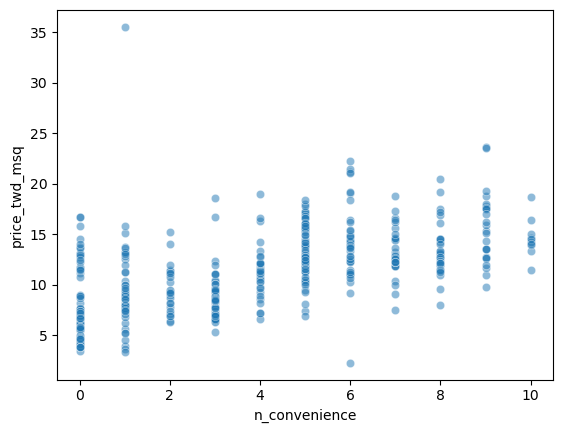

In [42]:
# for now we will limit our exploration to relations between "price_twd_msq" and "n_convenience"
# let's plot a simple scatterplot
# since "price_twd_msq" is int type, we use "alpha = 0.5"
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=taiwan_real_estate,
                alpha=0.5)

plt.show()

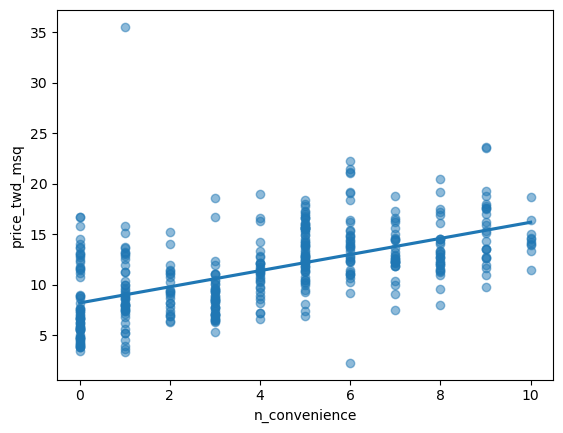

In [43]:
# We can use `sns.regplot()` to plot the data and a linear regression model fit.
# plotting a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x="n_convenience",
         y="price_twd_msq",
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5})

plt.show()

While `sns.regplot()` can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means sometimes you'll need to run a linear regression yourself.

### Intro to the statsmodel package ([Documentation](https://www.statsmodels.org/stable/user-guide.html))

> Statsmodels uses `endog` and `exog` as names for describing the observed variables that are used in an estimation problem. You are probably more familiar with the terms `dependent` and `independent variables`, respectively. They are often also called `response` and `explanatory variables`, `y` and `x`, or `outcome` and `design`. A mnemonic hint to keep the two terms apart is that exogenous has an “x”, as in x-variable, in its name.

> Importing of modules can be done in multiple ways. See the documentation [here](https://www.statsmodels.org/stable/api-structure.html). 


  - API import for interactive use: initially `from statsmodels import api as sm` is executed. We then go deeper from here on to access the modules and functions.

In [44]:
import statsmodels.api as sm

In [45]:
dir(sm)

['BayesGaussMI',
 'BinomialBayesMixedGLM',
 'ConditionalLogit',
 'ConditionalMNLogit',
 'ConditionalPoisson',
 'Factor',
 'GEE',
 'GLM',
 'GLMGam',
 'GLS',
 'GLSAR',
 'GeneralizedPoisson',
 'HurdleCountModel',
 'Logit',
 'MANOVA',
 'MI',
 'MICE',
 'MICEData',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NegativeBinomialP',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PCA',
 'PHReg',
 'Poisson',
 'PoissonBayesMixedGLM',
 'ProbPlot',
 'Probit',
 'QuantReg',
 'RLM',
 'RecursiveLS',
 'SurvfuncRight',
 'TruncatedLFNegativeBinomialP',
 'TruncatedLFPoisson',
 'WLS',
 'ZeroInflatedGeneralizedPoisson',
 'ZeroInflatedNegativeBinomialP',
 'ZeroInflatedPoisson',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__version__',
 '__version_info__',
 'add_constant',
 'categorical',
 'cov_struct',
 'datasets',
 'distributions',
 'duration',
 'emplike',
 'families',
 'formula',
 'gam',
 'genmod',
 'graphics',
 'iolib',
 'load',
 

In [48]:
dir(sm.regression)

['PytestTester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_prediction',
 '_tools',
 'linear_model',
 'mixed_linear_model',
 'quantile_regression',
 'recursive_ls',
 'test',
 'yule_walker']

In [49]:
dir(sm.regression.linear_model)

['Appender',
 'Float64Array',
 'GLS',
 'GLSAR',
 'InvalidTestWarning',
 'Literal',
 'OLS',
 'OLSResults',
 'PredictionResults',
 'RegressionModel',
 'RegressionResults',
 'RegressionResultsWrapper',
 'Sequence',
 'ValueWarning',
 'WLS',
 '_ELRegOpts',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fit_regularized_doc',
 '_get_sigma',
 'annotations',
 'base',
 'bool_like',
 'burg',
 'cache_readonly',
 'cache_writable',
 'cholesky',
 'dtrtri',
 'float_like',
 'lrange',
 'lzip',
 'np',
 'optimize',
 'pinv_extended',
 'pred',
 'stats',
 'string_like',
 'toeplitz',
 'warnings',
 'wrap',
 'yule_walker']

- Direct import for programs: statsmodels `submodules are arranged by topic` (e.g. discrete for discrete choice models, or tsa for time series analysis). Some example imports are given below.

In [50]:
from statsmodels.regression import linear_model

In [51]:
dir(linear_model)

['Appender',
 'Float64Array',
 'GLS',
 'GLSAR',
 'InvalidTestWarning',
 'Literal',
 'OLS',
 'OLSResults',
 'PredictionResults',
 'RegressionModel',
 'RegressionResults',
 'RegressionResultsWrapper',
 'Sequence',
 'ValueWarning',
 'WLS',
 '_ELRegOpts',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__docformat__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_fit_regularized_doc',
 '_get_sigma',
 'annotations',
 'base',
 'bool_like',
 'burg',
 'cache_readonly',
 'cache_writable',
 'cholesky',
 'dtrtri',
 'float_like',
 'lrange',
 'lzip',
 'np',
 'optimize',
 'pinv_extended',
 'pred',
 'stats',
 'string_like',
 'toeplitz',
 'warnings',
 'wrap',
 'yule_walker']

> Another way of using most of the avialable models is to use the `statsmodels.formula.api` module. The `formula.api` hosts many of the same functions found in `api` (e.g. OLS, GLM), but it also holds lower case counterparts for most of these models. 

In general, **lower case** models `accept formula and df arguments`, whereas **upper case** ones `take endog and exog design matrices`. We have to create these design matrices ourselves from the data (usually using the `patsy.dmatrices` function from the `patsy` package). Since we have the data as pandas dataframe we will be using the lower case models from the `statsmodels.formula.api` module.

The `formula` argument accepts a string which describes the model in terms of a `patsy formula` and the `df` argument takes a `pandas data frame`.

*Formula-compatible models have the following generic call signature:* (formula, data, subset=None, *args, **kwargs)

In [52]:
import statsmodels.formula.api as smf

In [53]:
dir(smf)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'conditional_logit',
 'conditional_mnlogit',
 'conditional_poisson',
 'gee',
 'glm',
 'glmgam',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

> Below is an introduction to how the formula strings are constructed. For more details, see the [patsy documentation](https://patsy.readthedocs.io/en/latest/formulas.html).

### Fitting a linear regression model

> There are various models avilable for linear regression modeling such as, estimation by ordinary least squares (OLS), weighted least squares (WLS), generalized least squares (GLS), and feasible generalized least squares with autocorrelated AR(p) errors.
>
>> See the documentation [here](https://www.statsmodels.org/stable/regression.html) for more details.